In [451]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [452]:
#Importar data
df = pd.read_csv("data.csv")
print(df.head())

         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

  Cost Revenue   Price  Utility  Rank  Combination  Dry  ...  Unnamed: 991  \
0  175    0.15  201.25    26.25   4.1          1.0  1.0  ...           NaN   
1  179    0.13  202.27    23.27   4.1          1.0  1.0  ...           NaN   
2   68    0.12   76.16     8.16   4.4          1.0  1.0  ...           NaN   
3  175    0.12  196.00    21.00   3.8          1.0  1.0  ...           NaN   
4   38    0.09   41.42     3.42   4.1          1.0  1.0  ...           NaN   

   Unnamed: 992  Unnamed: 993  Unnamed: 994 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10188\1757755306.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [453]:

# Seleccionar todas las filas y las columnas hasta 'Dry' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

# Mostrar el nuevo DataFrame
print(new_df)


            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

In [454]:
new_df.shape


(1472, 13)

In [455]:
print(new_df.head())


         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

  Cost Revenue   Price  Utility  Rank  Combination  Dry  Normal  Oily  \
0  175    0.15  201.25    26.25   4.1          1.0  1.0     1.0   1.0   
1  179    0.13  202.27    23.27   4.1          1.0  1.0     1.0   1.0   
2   68    0.12   76.16     8.16   4.4          1.0  1.0     1.0   1.0   
3  175    0.12  196.00    21.00   3.8          1.0  1.0     1.0   1.0   
4   38    0.09   41.42     3.42   4.1          1.0  1.0     1.0   1.0   

   Sensitive  
0        1.0  
1        1.0  
2        0.0  
3        1.0  

In [456]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv("data.csv")

# Seleccionar todas las filas y las columnas hasta 'Dry' (inclusive)
new_df = df.iloc[:, :df.columns.get_loc('Sensitive')+1]

# Mostrar el nuevo DataFrame
print(new_df)

            Label                          Brand  \
0     Moisturizer                         LA MER   
1     Moisturizer                          SK-II   
2     Moisturizer                 DRUNK ELEPHANT   
3     Moisturizer                         LA MER   
4     Moisturizer                   IT COSMETICS   
...           ...                            ...   
1467  Sun protect                         KORRES   
1468  Sun protect                KATE SOMERVILLE   
1469  Sun protect                  VITA LIBERATA   
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS   
1471  Sun protect                     DERMAFLASH   

                                                   Name Cost Revenue   Price  \
0                                       Crème de la Mer  175    0.15  201.25   
1                              Facial Treatment Essence  179    0.13  202.27   
2                            Protini™ Polypeptide Cream   68    0.12   76.16   
3                           The Moisturizing Soft Cream

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10188\2774417821.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [457]:
# Revisamos los tipos de variables que se encuentran en el data frame 
data_types = new_df.dtypes

print("Tipos de datos de las columnas:")
print(data_types)


Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost            object
Revenue         object
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


In [458]:
#Al ravisar la data, nos damos cuenta que la variable "Revenue" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.
#  # Limpia los valores reemplazando comas y otros caracteres no numéricos
new_df['Revenue'] = new_df['Revenue'].str.replace(',', '').str.replace('$', '')

# Intenta convertir la columna a tipo numérico
new_df['Revenue'] = pd.to_numeric(new_df['Revenue'], errors='coerce')

# Multiplica por 100 para convertir a porcentajes
new_df['Revenue'] = new_df['Revenue'] * 100

# Verifica los tipos de datos nuevamente
data_types = new_df.dtypes
print("Tipos de datos de las columnas:")
print(data_types)

Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost            object
Revenue        float64
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10188\829020577.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['Revenue'] = new_df['Revenue'].str.replace(',', '').str.replace('$', '')


In [459]:
#Al ravisar la data, nos damos cuenta que la variable "Cost" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.#Al ravisar la data, nos damos cuenta que la variable "Revenue" es una variable de tipo objeto por lo cual tenemos que cambiarla a float.
# Limpia los valores reemplazando comas y otros caracteres no numéricos
new_df['Cost'] = new_df['Cost'].str.replace(',', '').str.replace('$', '')

# Intenta convertir la columna a tipo numérico
new_df['Cost'] = pd.to_numeric(new_df['Cost'], errors='coerce')

# Multiplica por 100 para convertir a porcentajes
new_df['Cost'] = new_df['Cost'] * 100

# Verifica los tipos de datos nuevamente
data_types = new_df.dtypes
print("Tipos de datos de las columnas:")
print(data_types)

Tipos de datos de las columnas:
Label           object
Brand           object
Name            object
Cost           float64
Revenue        float64
Price          float64
Utility        float64
Rank           float64
Combination    float64
Dry            float64
Normal         float64
Oily           float64
Sensitive      float64
dtype: object


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10188\569423038.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['Cost'] = new_df['Cost'].str.replace(',', '').str.replace('$', '')


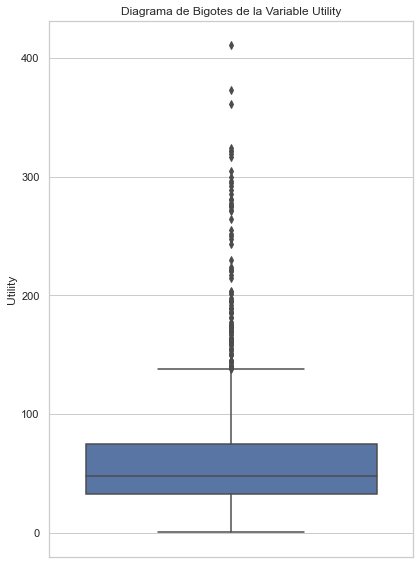

In [460]:
#Boxplot Utility
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Utility'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Utility' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Utility')
plt.ylabel('Utility')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


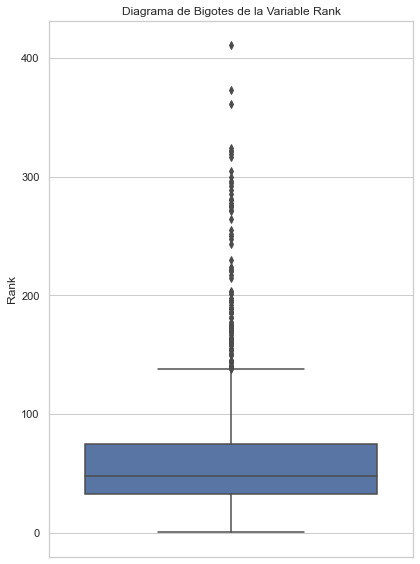

In [461]:
#Boxplot Rank
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Rank'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Rank' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Rank')
plt.ylabel('Rank')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


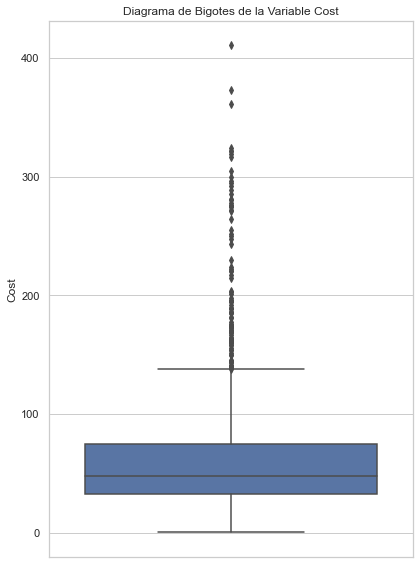

In [462]:
#Boxplot Cost
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Cost'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Cost' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Cost')
plt.ylabel('Cost')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()


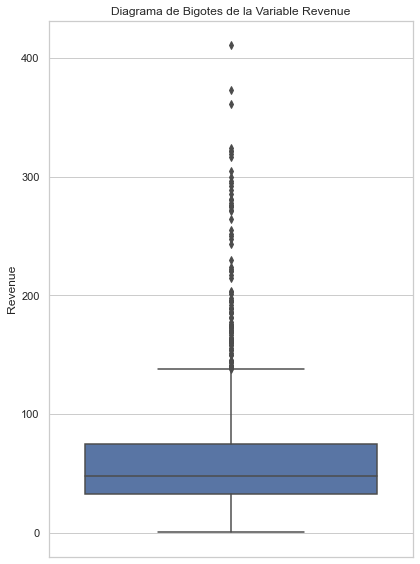

In [463]:
#Boxplot Revenue
sns.set(style="whitegrid")  # Establece el estilo del gráfico

# Crear el diagrama de bigotes para la variable 'Revenue'
plt.figure(figsize=(6, 8))  # Ajusta el tamaño de la figura
sns.boxplot(y='Price', data=new_df)  # Cambia 'Revenue' por la columna adecuada
plt.title('Diagrama de Bigotes de la Variable Revenue')
plt.ylabel('Revenue')
plt.tight_layout()  # Ajusta el espaciado entre elementos del gráfico
plt.show()

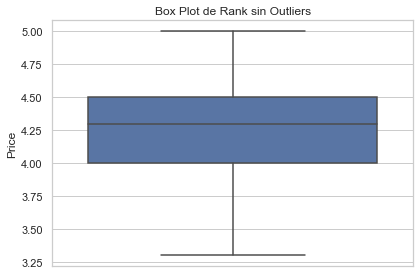

In [464]:
#'Rank' eliminación de outliers
rank_data = new_df['Rank']

# Calcular el IQR
Q1 = np.percentile(rank_data, 25)
Q3 = np.percentile(rank_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_rank_data = rank_data[(rank_data >= lower_bound) & (rank_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_rank_data)
plt.title('Box Plot de Rank sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [465]:

# Eliminamos los valores nulos de la variable "Revenue"
new_df = new_df.dropna(subset=['Revenue'])

# Verificar que los valores nulos han sido eliminados
print(new_df['Revenue'].isnull().sum())  # Muestra  0

0


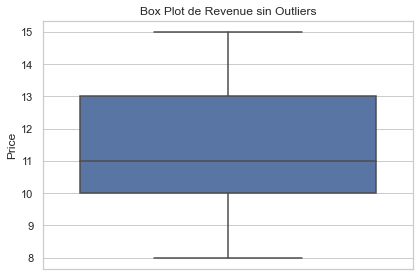

In [466]:
#'Revenue' eliminación de outliers
revenue_data = new_df['Revenue']

# Calcular el IQR
Q1 = np.percentile(revenue_data, 25)
Q3 = np.percentile(revenue_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_revenue_data = revenue_data[(revenue_data >= lower_bound) & (revenue_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_revenue_data)
plt.title('Box Plot de Revenue sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()



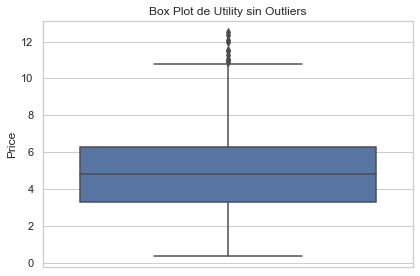

In [467]:
#'Utility' eliminación de outliers
utility_data = new_df['Utility']

# Calcular el IQR
Q1 = np.percentile(utility_data, 25)
Q3 = np.percentile(utility_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_utility_data = utility_data[(utility_data >= lower_bound) & (utility_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_utility_data)
plt.title('Box Plot de Utility sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [468]:

# Eliminamos los valores nulos de la variable "Cost"
new_df = new_df.dropna(subset=['Cost'])

# Verificar que los valores nulos han sido eliminados
print(new_df['Cost'].isnull().sum())  # Muestra  0

0


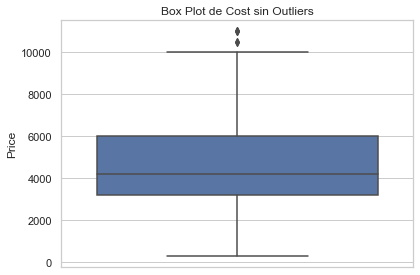

In [469]:

#'Cost' eliminación de outliers
cost_data = new_df['Cost']

# Calcular el IQR
Q1 = np.percentile(cost_data, 25)
Q3 = np.percentile(cost_data, 75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos
filtered_cost_data = cost_data[(cost_data >= lower_bound) & (cost_data <= upper_bound)]

# Box plot con los datos filtrados
sns.boxplot(y=filtered_cost_data)
plt.title('Box Plot de Cost sin Outliers')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Label', ylabel='count'>

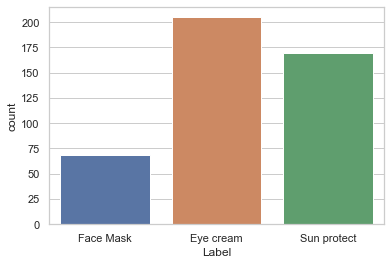

In [470]:
#Graficamos la varibale "Label" con el fin de identificar la cantidad de categorias.
sns.countplot(x="Label", data=new_df)

Luego de ver que esta variable tiene pocas categorias, 6 en total, convertimos esas variables en variables dummies, para que hagan parte de la regresion lineal.

In [471]:

dummies_l = pd.get_dummies(df['Label'], prefix='Label', drop_first=True)

# Concatenar las columnas dummies al DataFrame original
new_df = pd.concat([new_df, dummies_l], axis=1)

# Mostrar las primeras filas del DataFrame con las nuevas columnas dummies
print(new_df.head())


          Label      Brand                                      Name    Cost  \
1024  Face Mask       DIOR   Hydra Life Extra Plump Smooth Balm Mask  6900.0   
1025  Face Mask  DR. JART+   Dermask Micro Jet Brightening Solution™   900.0   
1026  Face Mask  DR. JART+     Dermask Intra Jet Wrinkless Solution™   900.0   
1027  Face Mask     BLITHE  Energy Yellow Citrus & Honey Splash Mask  4500.0   
1028  Face Mask    LANCÔME                           Rose Jelly Mask  3500.0   

      Revenue  Price  Utility  Rank  Combination  Dry  Normal  Oily  \
1024     14.0  78.66     9.66   4.6          1.0  1.0     1.0   0.0   
1025     12.0  10.08     1.08   4.0          1.0  1.0     1.0   1.0   
1026     10.0   9.90     0.90   3.9          1.0  1.0     1.0   1.0   
1027      9.0  49.05     4.05   4.2          1.0  1.0     1.0   0.0   
1028     14.0  39.90     4.90   4.1          1.0  1.0     1.0   1.0   

      Sensitive  Label_Eye cream  Label_Face Mask  Label_Moisturizer  \
1024        0.0     

In [472]:
# Lista de columnas dummies
dummies_columns = ['Label_Eye cream', 'Label_Face Mask', 'Label_Moisturizer', 'Label_Sun protect','Label_Treatment']

# Convierte las columnas de dummies en 0 y 1
for col in dummies_columns:
    new_df[col] = new_df[col].astype(int)
print(new_df.head())

          Label      Brand                                      Name    Cost  \
1024  Face Mask       DIOR   Hydra Life Extra Plump Smooth Balm Mask  6900.0   
1025  Face Mask  DR. JART+   Dermask Micro Jet Brightening Solution™   900.0   
1026  Face Mask  DR. JART+     Dermask Intra Jet Wrinkless Solution™   900.0   
1027  Face Mask     BLITHE  Energy Yellow Citrus & Honey Splash Mask  4500.0   
1028  Face Mask    LANCÔME                           Rose Jelly Mask  3500.0   

      Revenue  Price  Utility  Rank  Combination  Dry  Normal  Oily  \
1024     14.0  78.66     9.66   4.6          1.0  1.0     1.0   0.0   
1025     12.0  10.08     1.08   4.0          1.0  1.0     1.0   1.0   
1026     10.0   9.90     0.90   3.9          1.0  1.0     1.0   1.0   
1027      9.0  49.05     4.05   4.2          1.0  1.0     1.0   0.0   
1028     14.0  39.90     4.90   4.1          1.0  1.0     1.0   1.0   

      Sensitive  Label_Eye cream  Label_Face Mask  Label_Moisturizer  \
1024        0.0     

<AxesSubplot:xlabel='Brand', ylabel='count'>

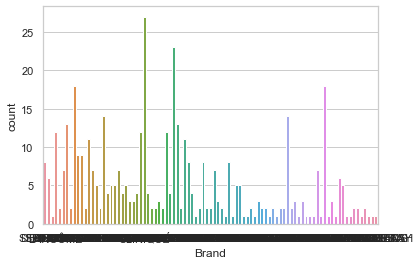

In [473]:
#Graficamos la varibale "Brand" con el fin de identificar la cantidad de categorias.
sns.countplot(x="Brand", data=new_df)

Al graficar nos damos cuenta que la variable "Brand" cuenta con muchas categorias, por lo cual decidimos no usarla en la regresion.


In [474]:
new_df.shape

(1472, 18)

In [475]:
new_df = new_df.dropna()


In [476]:
columns_to_drop = ['Label_Moisturizer', 'Label_Treatment']
new_df.drop(columns=columns_to_drop, inplace=True)


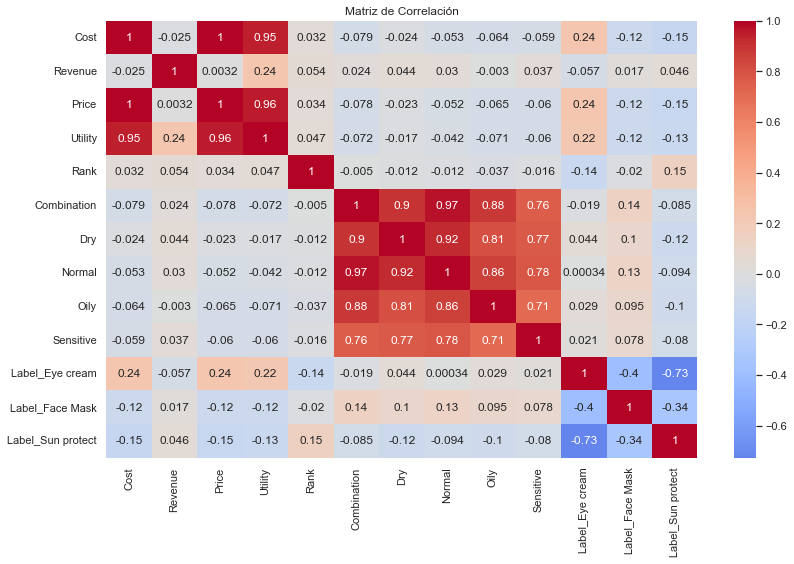

In [477]:

# Seleccionar las columnas numéricas
numeric_columns = new_df.select_dtypes(include=['number'])

# Sobrescribir el DataFrame con las columnas numéricas
new_df = numeric_columns

# Crear la matriz de correlacion con las variables numericas
correlation_matrix = new_df.corr()

# Crear la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()


In [478]:
column_titles = new_df.columns.tolist()

print(column_titles)

['Cost', 'Revenue', 'Price', 'Utility', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']


REGRESIÓN LINEAL FULL

In [495]:

# Supongamos que 'new_df' es tu DataFrame y contiene las variables mencionadas

# Definir las variables independientes y la variable dependiente
X = new_df[['Cost', 'Utility', 'Revenue','Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']]
X = sm.add_constant(X)  # Agregar una constante (intercepto) b0
y = new_df['Price']

# Supongamos que 'X' y 'y' son tus matrices y vectores respectivamente
print("Dimensión de X:", X.shape)
print("Dimensión de y:", y.shape)

# Eliminar filas con valores faltantes en X y y


# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los resultados de la regresión
resultados = modelo.summary()

print(resultados)



Dimensión de X: (440, 13)
Dimensión de y: (440,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.673e+29
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:01:08   Log-Likelihood:                 12068.
No. Observations:                 440   AIC:                        -2.411e+04
Df Residuals:                     428   BIC:                        -2.406e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Regresión lineal de la forma simple sin multicolinealidad 

In [479]:

# Supongamos que 'new_df' es tu DataFrame y contiene las variables mencionadas

# Definir las variables independientes y la variable dependiente
X = new_df[['Revenue','Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']]
X = sm.add_constant(X)  # Agregar una constante (intercepto) b0
y = new_df['Price']

# Supongamos que 'X' y 'y' son tus matrices y vectores respectivamente
print("Dimensión de X:", X.shape)
print("Dimensión de y:", y.shape)

# Eliminar filas con valores faltantes en X y y


# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los resultados de la regresión
resultados = modelo.summary()

print(resultados)



Dimensión de X: (440, 11)
Dimensión de y: (440,)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.025
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.81e-05
Time:                        17:24:36   Log-Likelihood:                -2274.7
No. Observations:                 440   AIC:                             4569.
Df Residuals:                     430   BIC:                             4610.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Coeficientes:
Intercepto: 42.36896315641294
Coeficientes de Utility, Rank, Cost, Revenue: [  0.20299131   3.97026453 -37.59271767  13.00759234  26.39528712
  -1.75069112  -6.25647998  14.17356524  -8.02861925  -6.14494599]
Coeficiente de determinación (R^2): 0.07770049540092627


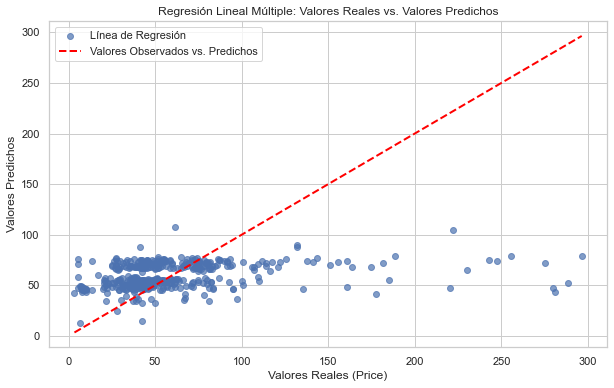

In [480]:
#Regresión lineal múltiple usando matrices

# Variables independientes (X) y variable dependiente (y)
X = new_df[['Revenue','Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']]
y = new_df['Price']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Coeficientes de regresión y término independiente
coeficientes = model.coef_
intercepto = model.intercept_

# Imprimir los coeficientes
print("Coeficientes:")
print("Intercepto:", intercepto)
print("Coeficientes de Utility, Rank, Cost, Revenue:", coeficientes)

# Calcular el coeficiente de determinación (R^2)
r2 = model.score(X, y)
print("Coeficiente de determinación (R^2):", r2)

# Realizar una predicción
y_pred = model.predict(X)

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar valores reales vs. valores predichos
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Valores Reales (Price)")
plt.ylabel("Valores Predichos")
plt.title("Regresión Lineal Múltiple: Valores Reales vs. Valores Predichos")
plt.grid(True)

# Añadir una línea de regresión
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2)
plt.legend(["Línea de Regresión", "Valores Observados vs. Predichos"])

plt.show()



In [481]:
# Supongamos que 'new_df' es tu DataFrame
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1024 to 1471
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cost               440 non-null    float64
 1   Revenue            440 non-null    float64
 2   Price              440 non-null    float64
 3   Utility            440 non-null    float64
 4   Rank               440 non-null    float64
 5   Combination        440 non-null    float64
 6   Dry                440 non-null    float64
 7   Normal             440 non-null    float64
 8   Oily               440 non-null    float64
 9   Sensitive          440 non-null    float64
 10  Label_Eye cream    440 non-null    int32  
 11  Label_Face Mask    440 non-null    int32  
 12  Label_Sun protect  440 non-null    int32  
dtypes: float64(10), int32(3)
memory usage: 43.0 KB


In [494]:

y = new_df['Price']
X = new_df[['Cost', 'Utility','Revenue','Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']]


# Ajustar el modelo con todas las variables predictoras
modelo_completo = sm.OLS(y, X).fit()

# Ajustar el modelo reducido sin las variables "Combination" y "Normal"
modelo_reducido = sm.OLS(y, X.drop(columns=['Rank', 'Label_Face Mask'])).fit()

# Realizar la prueba F de Fisher para comparar los modelos
diferencia = modelo_completo.compare_f_test(modelo_reducido)

# Obtener la estadística F y el valor p de la tupla
estadistica_f = diferencia[0]
valor_p = diferencia[1]

print("Estadística F:", estadistica_f)
print("Valor p:", valor_p)



Estadística F: -50.969158272636605
Valor p: 1.0


In [493]:

y = new_df['Price']
X = new_df[['Revenue','Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']]


# Ajustar el modelo con todas las variables predictoras
modelo_completo = sm.OLS(y, X).fit()

# Ajustar el modelo reducido sin las variables "Combination" y "Normal"
modelo_reducido = sm.OLS(y, X.drop(columns=['Rank', 'Label_Face Mask'])).fit()

# Realizar la prueba F de Fisher para comparar los modelos
diferencia = modelo_completo.compare_f_test(modelo_reducido)

# Obtener la estadística F y el valor p de la tupla
estadistica_f = diferencia[0]
valor_p = diferencia[1]

print("Estadística F:", estadistica_f)
print("Valor p:", valor_p)



Estadística F: 9.285626237449293
Valor p: 0.00011270907165837962


problema de multicolinealidad

In [484]:
#Mejor modelo con todas las variables pero sin Utility y Cost
# Variables dependiente (y) y las variables independientes (predictores)
y = new_df['Price']

# Crear una lista de variables predictoras
predictors = ['Revenue', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']

# Inicializar listas para almacenar resultados
aic_scores = []
bic_scores = []
cp_scores = []

# Ajustar modelos individuales y calcular los criterios para cada predictor
for predictor in predictors:
    X = sm.add_constant(new_df[predictor])
    model = sm.OLS(y, X).fit()
    
    aic = model.aic
    bic = model.bic
    
    # Calcular CP
    n = len(y)
    p = 2  # Incluye el predictor y el intercepto
    cp = ((1 / n) * (model.ssr / model.mse_resid)) + (2 * (p + 1)) - n
    
    aic_scores.append(aic)
    bic_scores.append(bic)
    cp_scores.append(cp)

# Crear un DataFrame para comparar los resultados
results_df = pd.DataFrame({
    'Predictor': predictors,
    'AIC': aic_scores,
    'BIC': bic_scores,
    'CP': cp_scores
})

# Determinar el mejor modelo según cada criterio
best_model_aic = results_df[results_df['AIC'] == min(results_df['AIC'])]
best_model_bic = results_df[results_df['BIC'] == min(results_df['BIC'])]
best_model_cp = results_df[results_df['CP'] == min(results_df['CP'])]

print("Mejor modelo según AIC:")
print(best_model_aic)

print("\nMejor modelo según BIC:")
print(best_model_bic)

print("\nMejor modelo según CP:")
print(best_model_cp)


Mejor modelo según AIC:
         Predictor          AIC          BIC          CP
7  Label_Eye cream  4563.393898  4571.567448 -433.004545

Mejor modelo según BIC:
         Predictor          AIC          BIC          CP
7  Label_Eye cream  4563.393898  4571.567448 -433.004545

Mejor modelo según CP:
           Predictor          AIC          BIC          CP
0            Revenue  4588.930276  4597.103826 -433.004545
1               Rank  4588.439995  4596.613545 -433.004545
2        Combination  4586.215541  4594.389091 -433.004545
3                Dry  4588.697780  4596.871329 -433.004545
4             Normal  4587.733582  4595.907131 -433.004545
5               Oily  4587.070995  4595.244545 -433.004545
6          Sensitive  4587.372449  4595.545999 -433.004545
7    Label_Eye cream  4563.393898  4571.567448 -433.004545
8    Label_Face Mask  4582.374725  4590.548275 -433.004545
9  Label_Sun protect  4578.529043  4586.702592 -433.004545


In [489]:
#Mejor modelo con las de menor valor 
# Variables dependiente (y) y las variables independientes (predictores)
y = new_df['Price']

# Crear una lista de variables predictoras
predictors = ['Combination', 'Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']

# Inicializar listas para almacenar resultados
aic_scores = []
bic_scores = []
cp_scores = []

# Ajustar modelos individuales y calcular los criterios para cada predictor
for predictor in predictors:
    X = sm.add_constant(new_df[predictor])
    model = sm.OLS(y, X).fit()
    
    aic = model.aic
    bic = model.bic
    
    # Calcular CP
    n = len(y)
    p = 2  # Incluye el predictor y el intercepto
    cp = ((1 / n) * (model.ssr / model.mse_resid)) + (2 * (p + 1)) - n
    
    aic_scores.append(aic)
    bic_scores.append(bic)
    cp_scores.append(cp)

# Crear un DataFrame para comparar los resultados
results_df = pd.DataFrame({
    'Predictor': predictors,
    'AIC': aic_scores,
    'BIC': bic_scores,
    'CP': cp_scores
})

# Determinar el mejor modelo según cada criterio
best_model_aic = results_df[results_df['AIC'] == min(results_df['AIC'])]
best_model_bic = results_df[results_df['BIC'] == min(results_df['BIC'])]
best_model_cp = results_df[results_df['CP'] == min(results_df['CP'])]

print("Mejor modelo según AIC:")
print(best_model_aic)

print("\nMejor modelo según BIC:")
print(best_model_bic)

print("\nMejor modelo según CP:")
print(best_model_cp)


Mejor modelo según AIC:
         Predictor          AIC          BIC          CP
1  Label_Eye cream  4563.393898  4571.567448 -433.004545

Mejor modelo según BIC:
         Predictor          AIC          BIC          CP
1  Label_Eye cream  4563.393898  4571.567448 -433.004545

Mejor modelo según CP:
           Predictor          AIC          BIC          CP
0        Combination  4586.215541  4594.389091 -433.004545
1    Label_Eye cream  4563.393898  4571.567448 -433.004545
2    Label_Face Mask  4582.374725  4590.548275 -433.004545
3  Label_Sun protect  4578.529043  4586.702592 -433.004545


Coeficientes:
Intercepto: 60.856466549041045
Coeficientes de Utility, Rank, Cost, Revenue: [-6.54812871 14.3319855  -8.40474263 -5.92724286]
Coeficiente de determinación (R^2): 0.06222695790104116


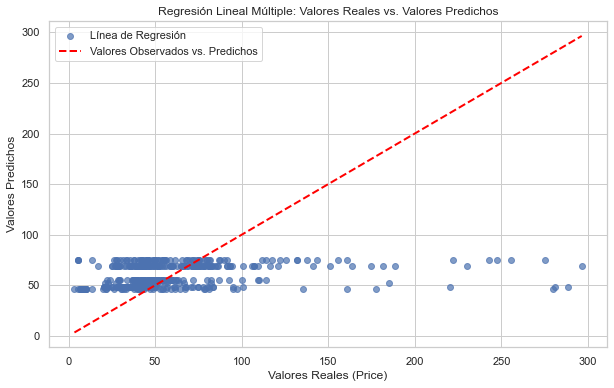

In [492]:
#Regresión lineal múltiple usando variables representativas 

# Variables independientes (X) y variable dependiente (y)
X = new_df[['Combination','Label_Eye cream', 'Label_Face Mask', 'Label_Sun protect']]
y = new_df['Price']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Coeficientes de regresión y término independiente
coeficientes = model.coef_
intercepto = model.intercept_

# Imprimir los coeficientes
print("Coeficientes:")
print("Intercepto:", intercepto)
print("Coeficientes de Utility, Rank, Cost, Revenue:", coeficientes)

# Calcular el coeficiente de determinación (R^2)
r2 = model.score(X, y)
print("Coeficiente de determinación (R^2):", r2)

# Realizar una predicción
y_pred = model.predict(X)

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar valores reales vs. valores predichos
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Valores Reales (Price)")
plt.ylabel("Valores Predichos")
plt.title("Regresión Lineal Múltiple: Valores Reales vs. Valores Predichos")
plt.grid(True)

# Añadir una línea de regresión
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2)
plt.legend(["Línea de Regresión", "Valores Observados vs. Predichos"])

plt.show()

